# Advanced Asset Pricing and Portfolio Management Assignment

## Introduction
---

<div class="alert alert-block alert-success">
<b>NOTE:</b> Please note that for the sake of briefness we do not report the detailed derivations and the (sometimes tedious) step-by-steps computations, but rather present a synthesis of the procedure of bond pricing in both Vasicek and Extended Vasicek model. For the rigorous and complete material, please refer to the <a href="https://github.com/edoberton/extended_vasicek/blob/main/assignment_coursework/vasicek_coursework.pdf">assignment notes</a>, which ought to be complementary to this notebook.
</div>

In this assignment we implement and estimate the standard Vasicek model as well as an extension (which we term the ''Extended'' Vasicek Model), in which we account for time-varying bond risk premium. In the extension we propose, the market price of interest rate risk $\lambda_{r,t}$, which contributes to bond risk premium, depends, through an affine relation, on the current value of the instantaneous interest rate $r_t$ as follows:

$$
\lambda_{r,t} = \lambda_0 + \lambda_1 \left( r_t - \bar{r}\right)
$$

with $\lambda_0, \lambda_1$ two real constants and $\bar{r}$ the long-term equilibrium interest rate.
In this framework, the market price of interest rate risk is not constant, as implied by the standard Vasicek specification, but is rather a function of the spread between the instantaneous interest rate and its long-term equilibrium value. The specification of a linear affine functional form for the market price of interest rate has various consequences on the pricing of bonds and, in general, of interest rate derivatives.

## 1. Vasicek Model
---

### 1.1 Instantaneous Interest Rate Dynamics 
---
The standard Vasicek Model assumes that the instantaneous interest rate follows univariate Ornstein-Uhlenbeck dynamics 

\begin{equation}\label{eq:dynamics}
dr_t = \theta(\bar{r} - r_t)dt + \sigma dW_t 
\end{equation}

where $\bar{r}, \theta, \sigma, r_0$ are positive constants. The instantaneous rate $r$ is mean reverting, as $t \rightarrow \infty$, $r$ converges to the value $\bar{r}$. The speed of mean reversion is given by the constant $\theta$, while $\sigma$ contributes to the volatility of the process. 

The solution to \eqref{eq:dynamics} is given by

\begin{equation}\label{eq:rt_expression}
r_t = r_se^{-\theta(t-s)} + \bar{r}\left( 1 - e^{-\theta(t-s)}\right) + \sigma \int_s^t e^{-\theta(t-v)}dW_v 
\end{equation}

By taking the expected value conditional on $\mathcal{F}_s$ of \eqref{eq:rt_expression} we find 

\begin{equation}\label{eq:mean_rt}
    \mathsf{E}\left[ r_t | \mathcal{F}_s \right] = r_se^{-\theta(t-s)} + \bar{r}\left( 1 - e^{-\theta(t-s)}\right)
\end{equation}

Finally, the conditional variance of $r_t$ is given by 

\begin{equation}\label{eq:var_rt}
    \text{Var}_s\left( r_t \right) = \sigma^2 \frac{1 - e^{-2\theta(t-s)}}{2\theta}
\end{equation}

### 1.2 Bond Pricing
---
Through a no-arbitrage argument, we are able to recover the price of a Bond under the dynamics of the interest rate provided in \eqref{eq:dynamics}. We assume that the expected instantaneous return of a bond under the physical measure $\mathbb{P}$ is given by the spot rate plus a risk premium component.

\begin{equation}\label{eq:expected_return}
\mathsf{E}[dB] = B_t r_t dt + B_r \sigma \lambda dt
\end{equation}

Notice that $B_r$ is the first order derivative of the bond price with respect to the interest rate. By means of Stochastic Calculus' tools we can write \eqref{eq:expected_return} as 

\begin{equation}\label{eq:pricing_eq}
	\left(B' + B_r\theta(\bar{r} - r_t) + \frac{1}{2}  B_{rr} \sigma^2 \right) dt = B_t r_t dt + B_r \sigma \lambda dt
\end{equation}

By means of the latter, provided the terminal condition $B(0, r_t) = 1$, we are able to retrieve the price of the bond. 

<div class="alert alert-block alert-info">
<b>Vasicek Bond Price:</b> 
    The price of a bond $B(\tau, r_t)$ with time to maturity $\tau=T-t$ given the current instantaneous interest rate $r_t$ is given by
	\begin{equation}
		B(\tau, r_t) = e^{-a(\tau) - b(\tau)r_t}
	\end{equation}
	with  
	\begin{eqnarray*}
	a(\tau) &=& \left(\tau - \frac{1 - e^{-\theta \tau}}{\theta} \right)\left(\bar{r} - \frac{\lambda \sigma}{\theta}\right) - \left(\tau - 2\frac{1 - e^{-\theta \tau}}{\theta} + \frac{1 - e^{-2\theta \tau}}{2\theta}\right)\frac{\sigma^2}{2\theta^2} \\
	b(\tau) &=& \frac{1 - e^{-\theta \tau}}{\theta}
	\end{eqnarray*}
</div>

At this point we are interested in making some considerations on the dynamics of the bond price. Through Ito's Lemma we find the differential of the Bond price

\begin{equation}\label{eq:sub_b_dynamics}
	dB = \left[B_t(a'(\tau) + b'(\tau)r_t) - B_t b(\tau)\theta(\bar{r}- r_t) + \frac{1}{2}B_t b(\tau)^2 \sigma^2\right]dt - B_tb(\tau)\sigma dW_t
\end{equation}

We plugging the derivatives of $a(\tau)$ and $b(\tau)$ into the above and rearranging to obtain

\begin{equation}\label{eq:db_dynamics}
	dB = B_t\left(r_t - b(\tau)\sigma \lambda\right) dt - B_tb(\tau) \sigma dW_t
\end{equation}

Finally, dividing both sides of \eqref{eq:db_dynamics} by $B_t$ and taking the expected value we find

\begin{equation}
	\mathsf{E} \left[ \frac{dB}{B_t} \right] = \left(r_t - b(\tau)\sigma \lambda\right) dt 
\end{equation}

It is worthwhile to analyse the latter equation. The drift term, which represents the unconditional expected value of the bond dynamics, consists of the instantaneous interest rate $r_t$ plus a time invariant component $\mu_{B, \tau} = - b(\tau)\sigma \lambda$, the risk premium. Notice in fact that $-b(\tau)\sigma$ is the volatility of $B$, while $\lambda$ is the market price of risk per unit of volatility.

Generally $\lambda < 0$, and hence $\mu_{B, \tau} > 0$. Therefore, the risk premium is an additional compensation that the investor demands to invest in the bond. The higher the absolute value of $\lambda$, the higher the required premium.

## 2. Extended Vasicek Model
---
### 2.1 Extension
---
In this section we consider a simple yet meaningful extension of the Vasicek model. We consider unitary cost of risk $\lambda$, which is constant in the baseline model, that depends on the spread between instantaneous and long-run equilibrium interest rate as follows 

\begin{equation}\label{eq:tvarying_price_risk}
	\lambda = \lambda_0 + \lambda_1 \left( r_t - \bar{r}\right)
\end{equation}

Note that this extension admits the general Vasicek model as a special case for $\lambda_1 = 0$.

Naturally, the extension to the dynamics of the price of risk does not affect the instantaneous rate dynamics. Therefore all the considerations in Section 1.1 still apply. In what follows, we consider the implications that the newly introduced framework has on the pricing of bonds.

### 2.2 Bond Pricing
---
In what follows, we derive the price of the bond given the behaviour of the market price described by \eqref{eq:tvarying_price_risk}.

Analogously to the previous case, we approach the pricing problem by a no-arbitrage argument. Let us recall the no-arbitrage condition we imposed in \eqref{eq:expected_return}

\begin{equation*}
	\mathsf{E}[dB] = B_t r_t dt + B_r \sigma \lambda dt
\end{equation*}

In the framework we develop, we substitute $\lambda$ with the equation for the time-varying interest rate risk market price $\lambda_{r,t}$

\begin{equation}\label{eq:no_arbitrage_tvarying}
	\mathsf{E}[dB] = B_t r_t dt + B_r \sigma \left(\lambda_0 + \lambda_1 (r_t - \bar{r}) \right) dt
\end{equation}

We equate the no-arbitrage expected return in \eqref{eq:no_arbitrage_tvarying} with the expected value of the differential obtained through Ito's Lemma 

\begin{equation}\label{eq:exp_value_bond}
	\left(\frac{\partial B}{\partial t} + B_r \theta (\bar{r} - r_t) + \frac{1}{2}B_{rr}\sigma^2 \right)dt = B_t r_t dt + B_r \sigma \left(\lambda_0 + \lambda_1 (r_t - \bar{r}) \right) dt
\end{equation}

We guess a functional form for the Bond price of the type $B(T-t, r_t) = B(\tau, r_t) = \exp\{-a(\tau)-b(\tau)r_t\}$. We report below the partial derivatives of $B$:

\begin{eqnarray}
	\frac{\partial B}{\partial t} &=& B' =  B_t (a'(\tau) + b'(\tau)r_t)\\
	\frac{\partial B}{\partial r} &=& B_r = -B_t b(\tau)  \\
	\frac{\partial^2 B}{\partial r^2} &=& B_{rr} = B_t b(\tau)^2
\end{eqnarray}

Plugging the partial derivatives in \eqref{eq:exp_value_bond} and dividing both sides by $dt$ yields

\begin{equation}
	B_t (a'(\tau) + b'(\tau)r_t) -B_t b(\tau) \theta (\bar{r} - r_t) + \frac{1}{2}B_t b(\tau)^2\sigma^2 = B_t r_t  -B_t b(\tau) \sigma \left(\lambda_0 + \lambda_1 (r_t - \bar{r})\right)
\end{equation}

By its very nature, the value of a bond at expiry is equal to the face value, formally $B(0, r_t) = 1$. Notice that, according to the chosen functional form, the latter boundary condition implies $a(0) = b(0) = 0$. 

We divide both sides by $B_t$ and we separate the terms that multiply $r_t$ from the others to obtain

\begin{eqnarray}
	&&a'(\tau) - b(\tau)\theta \bar{r} + \frac{1}{2} b(\tau)^2 \sigma^2 = -b(\tau)\sigma(\lambda_0 - \lambda_1 \bar{r}) \\
	&&b'(\tau) + b(\tau) \theta = 1 - b(\tau)\sigma \lambda_1 
\end{eqnarray}

Rearranging the above yields the following couple of ordinary differential equations

\begin{eqnarray}
	a'(\tau) &=&  b(\tau)\theta \bar{r} - \frac{1}{2} b(\tau)^2 \sigma^2 -b(\tau)\sigma(\lambda_0 - \lambda_1 \bar{r}) \label{eq:ODE1_2}\\
	b'(\tau) &=&  1 - b(\tau)(\theta + \sigma \lambda_1) \label{eq:ODE2_2}
\end{eqnarray}

Starting from \eqref{eq:ODE2_2} we set $\tilde{\theta} = \theta + \sigma \lambda_1$ and recover the functional form of $b(\tau)$

\begin{equation}
	b(\tau) = \frac{1}{\tilde{\theta}} + \frac{c}{e^{\tilde{\theta}\tau}}
\end{equation}

where $c \in \mathbb{R}$ is the integration constant. We impose the boundary condition $b(0) = 0$ to back out the value of $c$ as follows

\begin{equation}
	b(0) = \frac{1}{\tilde{\theta}} + \frac{c}{e^{\tilde{\theta}(0)}} \implies c = -\frac{1}{\tilde{\theta}}
\end{equation}

Plugging in the value of $c$ and rearranging concludes our computations for $b(\tau)$

\begin{equation}\label{eq:b_extended}
	b(\tau) = \frac{1 - e^{-\tilde{\theta}\tau}}{\tilde{\theta}}
\end{equation}

Now we turn our attention to \eqref{eq:ODE1_2}. Substituting $b(\tau)$ yields

\begin{equation}
	a'(\tau) =  \left(\frac{1 - e^{-\tilde{\theta}\tau}}{\tilde{\theta}}\right)\theta \bar{r} - \frac{1}{2}  \left(\frac{1 - e^{-\tilde{\theta}\tau}}{\tilde{\theta}}\right)^2 \sigma^2 - \left(\frac{1 - e^{-\tilde{\theta}\tau}}{\tilde{\theta}}\right)\sigma(\lambda_0 - \lambda_1 \bar{r}) 
\end{equation}

Integrating on both sides we get

\begin{equation}\label{eq:sol_of_a}
	a(\tau) =  \left(\frac{\tilde{\theta}\tau + e^{-\tilde{\theta}\tau}}{\tilde{\theta}^2}\right)\theta \bar{r} 
	- \frac{\sigma^2}{2{\tilde{\theta}}^2}  \left(\tau - \frac{e^{-2\tilde{\theta}\tau}}{2\tilde{\theta}} + \frac{2}{\tilde{\theta}}e^{-\tilde{\theta}\tau}\right)
	- \left(\frac{\tilde{\theta}\tau + e^{-\tilde{\theta}\tau}}{\tilde{\theta}^2}\right)\left(\lambda_0 - \lambda_1 \bar{r}\right)\sigma + c 
\end{equation}

Finally, imposing the terminal condition $a(0) = 0$ we are able to recover $c$

\begin{equation}\label{eq:c_of_a}
	a(0) = \left(\frac{1}{\tilde{\theta}^2}\right)\theta \bar{r} 
	- \frac{\sigma^2}{2{\tilde{\theta}}^2}  \left(- \frac{1}{2\tilde{\theta}} + \frac{2}{\tilde{\theta}}\right)
	- \left(\frac{1}{\tilde{\theta}^2}\right)\left(\lambda_0 - \lambda_1 \bar{r}\right)\sigma + c  \implies c = -\left(\frac{1}{\tilde{\theta}^2}\right)\left(\tilde{\theta}\bar{r} - \sigma\left(\lambda_0 - \lambda_1 \bar{r}\right) \right) + \frac{\sigma^2}{2{\tilde{\theta}}^2}  \left(- \frac{1}{2\tilde{\theta}} + \frac{2}{\tilde{\theta}}\right)
\end{equation}

By plugging \eqref{eq:c_of_a} into \eqref{eq:sol_of_a} we find

\begin{equation}\label{eq:a_extended}
	a(\tau) =  \left(\bar{r} - \frac{\sigma \lambda_0}{\tilde{\theta}}\right) \left(\tau - \frac{1 - e^{-\tilde{\theta}\tau}}{\tilde{\theta}}\right) - \frac{\sigma^2}{2\tilde{\theta}^2}\left[\tau - 2 \frac{1 - e^{-\tilde{\theta}\tau}}{\tilde{\theta}} + \frac{1 - e^{-2\tilde{\theta}\tau}}{2\tilde{\theta}} \right]
\end{equation}

<div class="alert alert-block alert-info">
<b>Extended Vasicek Bond Price:</b> 
    The price of a bond $B(\tau, r_t)$ with time to maturity $\tau=T-t$ given the current instantaneous interest rate $r_t$ is given by
		\begin{equation}
			B(\tau, r_t) = e^{-a(\tau) - b(\tau)r_t}
		\end{equation}
		with 
		\begin{eqnarray*}
			a(\tau) &=& \left(\bar{r} - \frac{\sigma \lambda_0}{\tilde{\theta}}\right) \left(\tau - \frac{1 - e^{-\tilde{\theta}\tau}}{\tilde{\theta}}\right) - \frac{\sigma^2}{2\tilde{\theta}^2}\left[\tau - 2 \frac{1 - e^{-\tilde{\theta}\tau}}{\tilde{\theta}} + \frac{1 - e^{-2\tilde{\theta}\tau}}{2\tilde{\theta}} \right] \\
			b(\tau) &=& \frac{1 - e^{-\tilde{\theta}\tau}}{\tilde{\theta}} \\
			\tilde{\theta} &=& \theta + \sigma \lambda_1
		\end{eqnarray*}
</div>

It seems appropriate to shed some light on the effect of the introduction of time-varying market price of risk. As in \eqref{eq:sub_b_dynamics} the dynamics of the bond price 

\begin{equation*}
	dB = \left[B_t(a'(\tau) + b'(\tau)r_t) - B_t b(\tau)\theta(\bar{r}- r_t) + \frac{1}{2}B_t b(\tau)^2 \sigma^2\right]dt - B_tb(\tau)\sigma dW_t
\end{equation*}

substituting to $a'(\tau), b'(\tau)$ their expressions in \eqref{eq:ODE1_2} and \eqref{eq:ODE2_2} respectively and dividing both sides by $B_t$ we obtain

\begin{eqnarray}
	\frac{dB}{B_t} &=& \left[(b(\tau)\theta \bar{r} - \frac{1}{2} b(\tau)^2 \sigma^2 -b(\tau)\sigma(\lambda_0 - \lambda_1 \bar{r}) + r_t - b(\tau)(\theta + \sigma \lambda_1)r_t) -  b(\tau)\theta(\bar{r}- r_t) + \frac{1}{2} b(\tau)^2 \sigma^2\right]dt - b(\tau)\sigma dW_t \nonumber \\
	&=& \left[r_t - b(\tau)\sigma(\lambda_0 + \lambda_1(r_t - \bar{r}))\right]dt- b(\tau)\sigma dW_t \label{eq:b_tvarying_dynamics}
\end{eqnarray}

The second equality follows from a mere algebraic rearrangement. The dynamics in \eqref{eq:b_tvarying_dynamics} are similar to those obtained in the baseline case. The difference lies in the drift parameter. Taking the expectation on both sides results in 

\begin{equation}
	\mathsf{E}\left[\frac{dB}{B_t}\right] = \left[r_t - b(\tau)\sigma(\lambda_0 + \lambda_1(r_t - \bar{r}))\right]dt
\end{equation}

By setting the market price of risk as a function of the spot interest rate, we introduced a time-varying drift in the process for the bond's price. In fact, the instantaneous expected return of the bond is now dependent on the gap between instantaneous interest rate and long-term equilibrium value. Assuming $\lambda_0, \lambda_1 < 0$, whenever $r_t > \bar{r}$ the instantaneous expected return is amplified. On the contrary, if $r_t < \bar{r}$, the term $\lambda_1(r_t - \bar{r})$ becomes positive and dampens the overall market price of risk $\lambda_{r,t}$. 

## 3. Numerical Exercise
---------------------
In this section we briefly inspect the data we feed the model. Then we implement (i) the Vasicek model and (ii) the "Extended Vasicek" model. We estimate the parameters for both models on the same dataset and we draw some conclusions based on the parameter estimates.

We begin by briefly inspecting the data. The data we feed the model is the **TIPS Yield Curves**. The U.S. Treasury issues Treasury inflation-protected securities (TIPS). The principal and coupon payments on TIPS are adjusted for inflation as measured by the change in the consumer price index (CPI) between the time of issuance and the time of the relevant payment. Since the rate of future inflation is unknown, the dollar amounts of future payments received by TIPS investors are uncertain: The higher the rate of inflation between issuance and payment, the higher the dollar amount of the payment. Because TIPS are riskless in real (as opposed to nominal) terms, **yields on TIPS are often thought of as “real yields.”**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
pi = np.pi

data = pd.read_csv(r'C:\Users\edoardo_berton\Desktop\vasicek_assignment\tips_data.csv')
data.head()

,Date,TIPSY02,TIPSY03,TIPSY04,TIPSY05,TIPSY06,TIPSY07,TIPSY08,TIPSY09,TIPSY10,TIPSY11,TIPSY12,TIPSY13,TIPSY14,TIPSY15,TIPSY16,TIPSY17,TIPSY18,TIPSY19,TIPSY20
0,1999-01-04,3.7676,3.8110,3.8458,3.8730,3.8936,3.9085,3.9186,3.9244,3.9266,3.9257,3.9223,3.9166,3.9090,3.9000,3.8896,3.8783,3.8661,3.8532,3.8399
1,1999-01-05,3.7476,3.8230,3.8726,3.9034,3.9204,3.9275,3.9275,3.9225,3.9142,3.9037,3.8920,3.8795,3.8668,3.8542,3.8419,3.8299,3.8185,3.8077,3.7974
2,1999-01-06,2.6224,3.7105,3.9307,3.9449,3.9177,3.8876,3.8620,3.8413,3.8245,3.8107,3.7992,3.7895,3.7811,3.7739,3.7675,3.7619,3.7570,3.7525,3.7485
3,1999-01-07,2.5442,3.7010,3.9420,3.9573,3.9255,3.8901,3.8597,3.8350,3.8150,3.7985,3.7847,3.7731,3.7631,3.7544,3.7468,3.7401,3.7342,3.7289,3.7241
4,1999-01-08,3.6486,3.7697,3.8360,3.8680,3.8789,3.8772,3.8682,3.8555,3.8410,3.8262,3.8116,3.7978,3.7850,3.7731,3.7622,3.7523,3.7432,3.7349,3.7274


In [2]:
# functions for visualizing results
def vprint_results(res):
    print('Estimation Results  ')
    print('-----------------------')
    print(f"lambda:  {res[0].round(6):14}")
    print(f"theta:   {res[1].round(6):14}")
    print(f"sigma_r: {res[2].round(6):14}")
    print(f"r_bar:   {res[3].round(6):14}")
    print('-----------------------')
    print('observation error vols:')
    for i in range(3, 10):
        print(f"sigma_{str(i)}: {res[i+1].round(6):14}")
    for i in range(10, 21):
        print(f"sigma_{str(i)}: {res[i+1].round(6):13}")

def evprint_results(res):
    print('Estimation Results  ')
    print('-----------------------')
    print(f"lambda0: {res[0].round(6):14}")
    print(f"lambda1: {res[1].round(6):14}")
    print(f"theta:   {res[2].round(6):14}")
    print(f"sigma_r: {res[3].round(6):14}")
    print(f"r_bar:   {res[4].round(6):14}")
    print('-----------------------')
    print('observation error vols:')
    for i in range(3, 10):
        print(f"sigma_{str(i)}: {res[i+2].round(6):14}")
    for i in range(10, 21):
        print(f"sigma_{str(i)}: {res[i+2].round(6):13}")

In [3]:
# preprocessing data
data['Date'] = pd.to_datetime(data.Date, format='%Y-%m-%d')
data.dropna(inplace=True)

# expressing rates in absolute values
for col in data.columns:    
    if col != 'Date':
        data[col] = data[col]/100

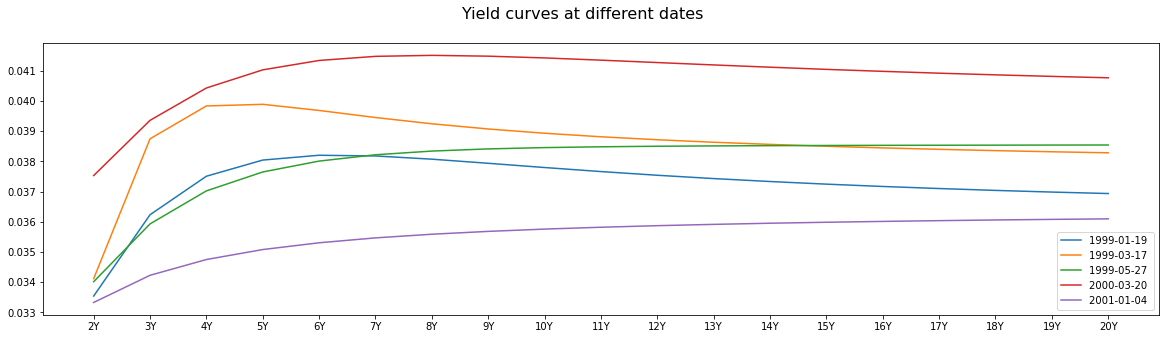

In [4]:
# plot the curves on different dates
indices = [10, 50, 100, 300, 500]
x_axis = ['2Y', '3Y', '4Y', '5Y', '6Y', '7Y', '8Y', '9Y', '10Y', '11Y',
          '12Y', '13Y', '14Y', '15Y', '16Y', '17Y', '18Y', '19Y', '20Y']


fig = plt.figure(figsize=(20,5))
fig.tight_layout()
fig.suptitle('Yield curves at different dates', fontsize=16)

for i in indices:
    plt.plot(x_axis, data.iloc[i, 1:], label=str(data.iloc[i,0])[:11])
    
plt.legend()
plt.show()

We can observe that the curves look very different at different dates.

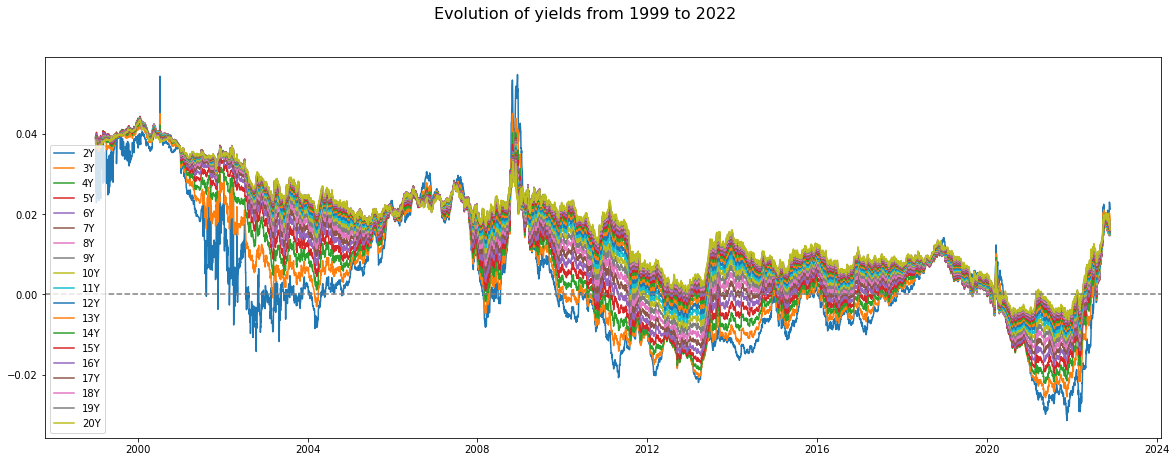

In [5]:
# let us plot the rates over time
fig = plt.figure(figsize=(20,7))
fig.tight_layout()
fig.suptitle('Evolution of yields from 1999 to 2022', fontsize=16)
for i in range(1,len(data.columns)):
    plt.plot(data.Date, data.iloc[:,i], label=str(i+1)+'Y')
    
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

This plot gives overview of the evolution of the curves over the years. The rates seem to follow a similar trend. However, they exhibit different volatilities. The most volatile one is, trivially, the shortest maturity (2Y). 

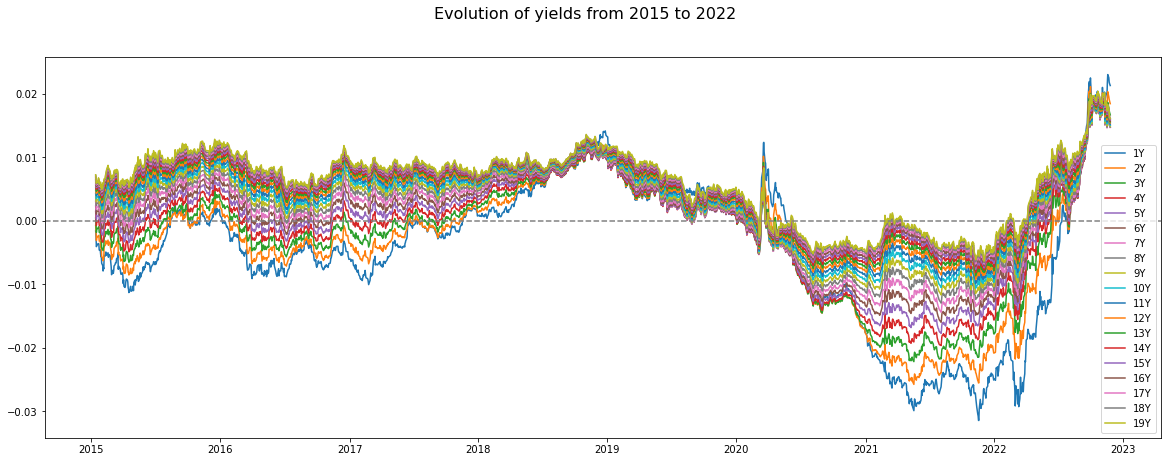

In [6]:
# we zoom in on some interval
fig = plt.figure(figsize=(20,7))
fig.tight_layout()
fig.suptitle('Evolution of yields from 2015 to 2022', fontsize=16)
for i in range(len(data.columns)-1):
    plt.plot(data.Date[4000:], data.iloc[4000:,i+1], label=str(i+1)+'Y')

plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

The figure above is a subset of the previous figure. In this plot we can appreciate more how the spread between different maturities is not constant but rather shrinks and expands over time.

### 3.1 Vasicek Model
--------------------------
In this section, we implement the Vasicek Model and estimate the parameters on the TIPS yields. We then make some consideration on the values of the parameters and on Bond pricing. 

In [7]:
# build functions a_tilde() and b_tilde()
def a_tilde(tau, theta, sigma, rbar, lamb):
    
    p1 = (tau - (1 - np.exp(-theta*tau))/(theta))*(rbar - (sigma * lamb)/theta)
    p2 = (sigma*sigma)/(2*(theta*theta))*(tau - 2*(1 - np.exp(-theta*tau))/theta + (1 - np.exp(-2*theta*tau))/(2*theta))
    return (p1 - p2)/tau

def b_tilde(tau, theta):
    return (1 - np.exp(-theta*tau))/(theta*tau)

We develop a toy model on some reasonable parameter assumptions to gauge the general behaviour of the model.

In [8]:
# set the initial guesses for the parameters
rbar = 0.03
theta = 0.05
sigma = 0.01
lamb = -0.3

In [9]:
# create the model implied spot interest rates

# closest yield is 2y
tau = 2

at = a_tilde(tau, theta, sigma, rbar,  lamb)
bt = b_tilde(tau, theta)

print('The value of a(tau=2) is: {}'.format(at*tau))
print('The value of b(tau=2) is: {}'.format(bt*tau))

y_0 = data.TIPSY02

mod_r = np.array((y_0 - at)/bt)

The value of a(tau=2) is: 0.008583568651555882
The value of b(tau=2) is: 1.9032516392808096


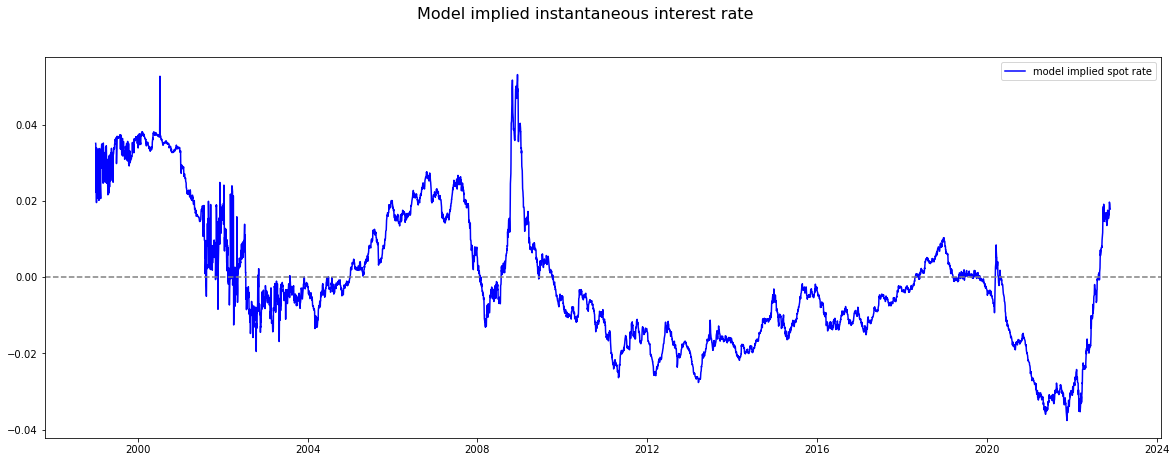

In [10]:
# plot the model derived spot rate given the initial parameters
fig = plt.figure(figsize=(20,7))
fig.tight_layout()
fig.suptitle('Model implied instantaneous interest rate', fontsize=16)
plt.plot(data.Date, mod_r, label='model implied spot rate', color='b')
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

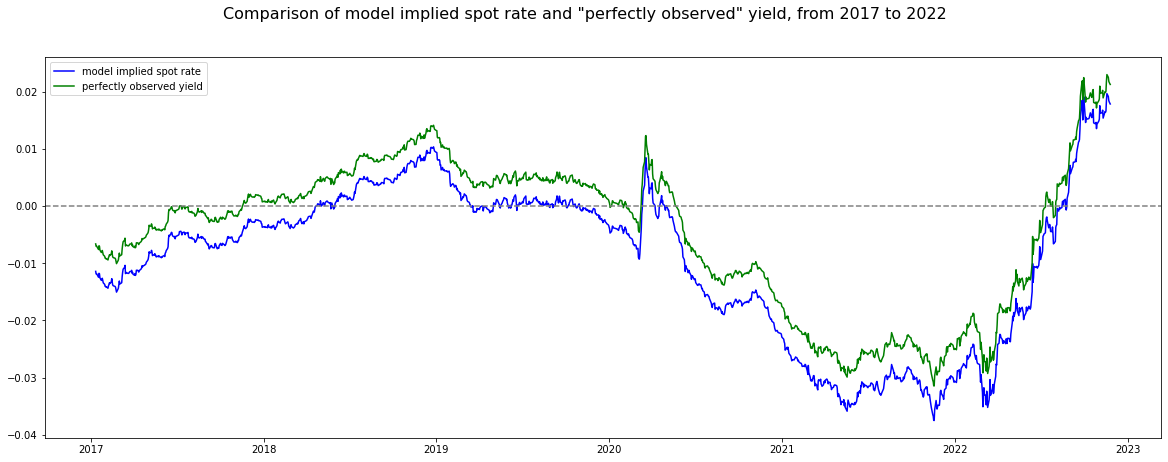

In [47]:
# compare model derived instantaneous rate with "perfectly observed" yield
fig = plt.figure(figsize=(20,7))
fig.tight_layout()
fig.suptitle('Comparison of model implied spot rate and "perfectly observed" yield, from 2017 to 2022', fontsize=16)
plt.plot(data.Date[4500:], mod_r[4500:], label='model implied spot rate', color='b')
plt.plot(data.Date[4500:], data.iloc[4500:, 1], label='perfectly observed yield', color='g')
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

We compare the model implied spot interest rate and the shortest maturity of the data (2Y). In the baseline Vasicek specification, the spot interest rate is a linear function of the "perfectly observed" yield. 

In [12]:
# model implied yields of maturities > 1y

tau = np.arange(2,21) # 19 maturities now 
a_vec = a_tilde(tau, theta, sigma, rbar, lamb)
b_vec = b_tilde(tau, theta)

mod_r_reshape = mod_r[1:].reshape(-1,1)

# matrix of model implied yields
y_matrix = a_vec + mod_r_reshape*b_vec
    
pd.DataFrame(data=y_matrix, columns=x_axis).head(10)

,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,11Y,12Y,13Y,14Y,15Y,16Y,17Y,18Y,19Y,20Y
0,0.037476,0.038672,0.039804,0.040875,0.041890,0.042852,0.043764,0.044630,0.045452,0.046233,0.046977,0.047684,0.048357,0.048998,0.049610,0.050193,0.050750,0.051282,0.051790
1,0.026224,0.027692,0.029087,0.030413,0.031675,0.032875,0.034019,0.035108,0.036147,0.037139,0.038085,0.038989,0.039854,0.040680,0.041471,0.042228,0.042954,0.043649,0.044316
2,0.025442,0.026929,0.028343,0.029686,0.030965,0.032182,0.033341,0.034447,0.035501,0.036507,0.037467,0.038385,0.039263,0.040102,0.040905,0.041675,0.042412,0.043119,0.043796
3,0.036486,0.037706,0.038861,0.039955,0.040991,0.041974,0.042907,0.043792,0.044633,0.045433,0.046194,0.046919,0.047609,0.048266,0.048894,0.049492,0.050064,0.050610,0.051132
4,0.022896,0.024445,0.025918,0.027319,0.028653,0.029925,0.031136,0.032292,0.033395,0.034449,0.035455,0.036418,0.037339,0.038220,0.039064,0.039872,0.040648,0.041391,0.042105
5,0.036509,0.037729,0.038883,0.039976,0.041012,0.041994,0.042926,0.043811,0.044652,0.045452,0.046212,0.046936,0.047626,0.048283,0.048910,0.049509,0.050080,0.050626,0.051148
6,0.035957,0.037190,0.038357,0.039463,0.040511,0.041505,0.042448,0.043344,0.044196,0.045006,0.045776,0.046510,0.047209,0.047875,0.048511,0.049118,0.049698,0.050251,0.050781
7,0.036074,0.037304,0.038469,0.039572,0.040617,0.041609,0.042550,0.043443,0.044293,0.045100,0.045869,0.046600,0.047297,0.047962,0.048596,0.049201,0.049779,0.050331,0.050859
8,0.034349,0.035621,0.036826,0.037968,0.039051,0.040079,0.041056,0.041984,0.042866,0.043706,0.044506,0.045267,0.045994,0.046687,0.047348,0.047980,0.048583,0.049161,0.049713
9,0.033544,0.034835,0.036059,0.037219,0.038320,0.039365,0.040358,0.041302,0.042201,0.043055,0.043869,0.044645,0.045385,0.046092,0.046766,0.047410,0.048026,0.048615,0.049178


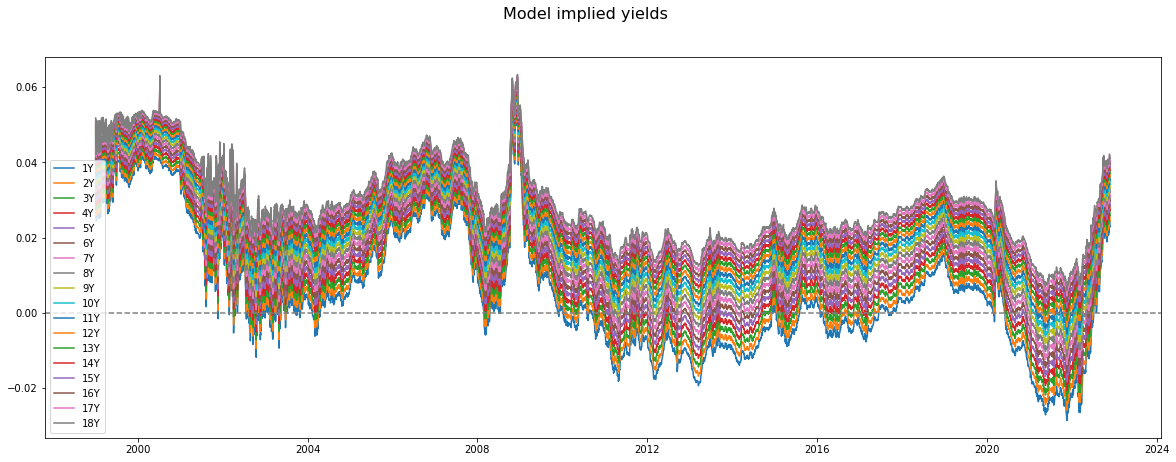

In [13]:
# plot the model derived spot rate given the initial parameters
fig = plt.figure(figsize=(20,7))
fig.tight_layout()
for i in range(y_matrix.shape[1]-1):
    plt.plot(data.Date[1:], y_matrix[:,i+1], label=str(i+1)+'Y')
fig.suptitle('Model implied yields', fontsize=16)
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

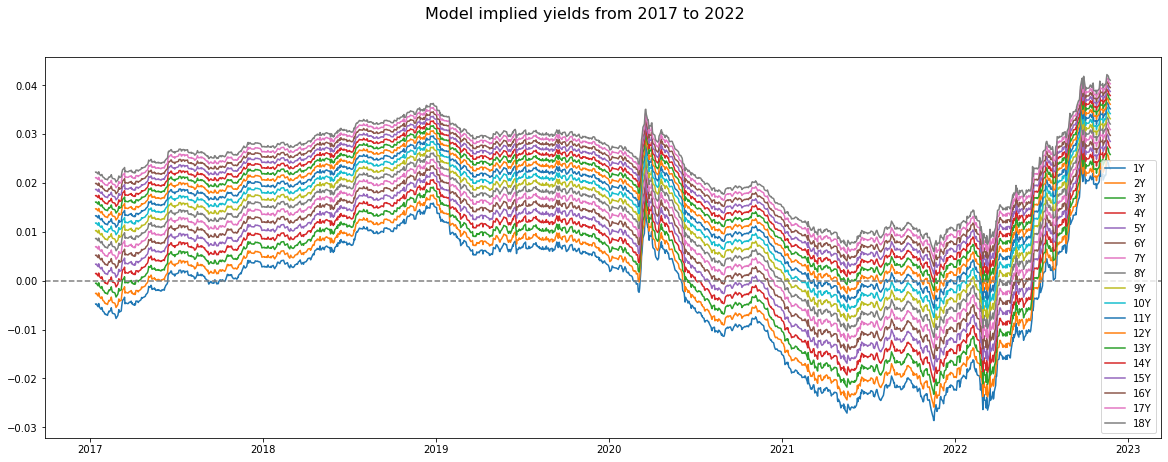

In [14]:
# we zoom in on some interval
fig = plt.figure(figsize=(20,7))
fig.tight_layout()
for i in range(y_matrix.shape[1]-1):
    plt.plot(data.Date[4501:], y_matrix[4500:,i+1], label=str(i+1)+'Y')
fig.suptitle('Model implied yields from 2017 to 2022', fontsize=16)
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

### 3.2 Vasicek Likelihood Function
----
In this section we construct the likelihood function for the baseline vasicek model and we estimate the parameters on the time series of TIPS yields.

In [15]:
def vasicek_loglik(par, *args):
    
    # init
    svec_sq = np.array(par[4:])**2 # vector of sigma_i squared
    lamb = par[0] # lambda
    theta = par[1] # theta
    sigma = par[2] # sigma_r
    rbar = par[3] # long-run equilibrium rate
    
    rmat = np.array(args[0]) # input rates
    delta = args[1] # Δt
    
    tau = np.arange(2,21) # maturities from 2 to 20
    a_vec = a_tilde(tau, theta, sigma, rbar, lamb)
    b_vec = b_tilde(tau, theta)

    mod_r = np.array((rmat[:,0] - a_vec[0])/b_vec[0]) # model implied instantaneous rate
    
    mod_r_reshape = mod_r[1:].reshape(-1,1)
    y_matrix = a_vec[1:] + mod_r_reshape*b_vec[1:] # model implied yield matrix
    
    # fitted parameters α and β
    a = rbar*(1-np.exp(-theta*delta))
    b = np.exp(-theta*delta)
    
    sigma_sq = (sigma*sigma)*(1 - np.exp(-2*theta*delta))/(2*theta) # σ^2(Δt)
    
    # probability of perfectly observed maturity
    probs = -(1/2)*np.log(2*pi*pow(b_vec[0],2)*sigma_sq) - ((mod_r[1:] - a - b*mod_r[:-1])**2/(2*sigma_sq))
    # probability of other maturities
    p1 = (-(1/2)*np.log(2*pi*svec_sq)).reshape(1,-1)
    probs_2 = p1 - ((rmat[1:,1:] - y_matrix)**2)/(2*svec_sq)
    return -1*(probs.sum() + probs_2.sum())

In [16]:
# setting initial guess
x0 = [-0.3, # lambda
       0.1, # theta
       0.05, # sigma
      -0.03] # rbar

x0 += [0.01 for i in range(18)] # vectors of estimation error volatilities

delta_t = 1/365 # Δt

In [17]:
bounds = ((None, None), # lambda
          (1e-6, None), # theta
          (1e-6, None), # sigma
          (None, None), # rbar
          (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None),
          (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None),
          (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None)) 

In [18]:
vasicek_params = minimize(vasicek_loglik, x0=x0, 
                          args=(data.iloc[:, 1:], delta_t), # args: additional arguments (input yields, Δt)
                          bounds = bounds,
                          options={'gtol': 1e-8, 'disp': True}).x

In [19]:
vprint_results(vasicek_params)

Estimation Results  
-----------------------
lambda:       -0.298649
theta:         0.089091
sigma_r:       0.029439
r_bar:        -0.030904
-----------------------
observation error vols:
sigma_3:       0.003433
sigma_4:       0.005128
sigma_5:       0.006049
sigma_6:       0.006583
sigma_7:       0.006906
sigma_8:       0.007111
sigma_9:       0.007244
sigma_10:      0.007334
sigma_11:      0.007397
sigma_12:      0.007443
sigma_13:      0.007478
sigma_14:      0.007506
sigma_15:       0.00753
sigma_16:      0.007551
sigma_17:      0.007568
sigma_18:      0.007583
sigma_19:      0.007596
sigma_20:      0.007606


### 3.3 Vasicek Yields and Risk Premia
---
In the sequel, we compute the model implied spot interest rate $\hat{r}_t$ using the parameters obtained through MLE. Moreover, we compute the risk premia according to the estimated parameters.

In [20]:
# estimated parameters
vlambda = vasicek_params[0]
vtheta = vasicek_params[1]
vsigma = vasicek_params[2]
vrbar = vasicek_params[3]

In [21]:
# compute model implied spot rate
tau = 2 # perfectly observed maturity

at = a_tilde(tau, vtheta, vsigma, vrbar,  vlambda)
bt = b_tilde(tau, vtheta)

y_0 = data.TIPSY02 # perfectly observed yield timeseries

v_spot = np.array((y_0 - at)/bt) # vasicek implied spot rate

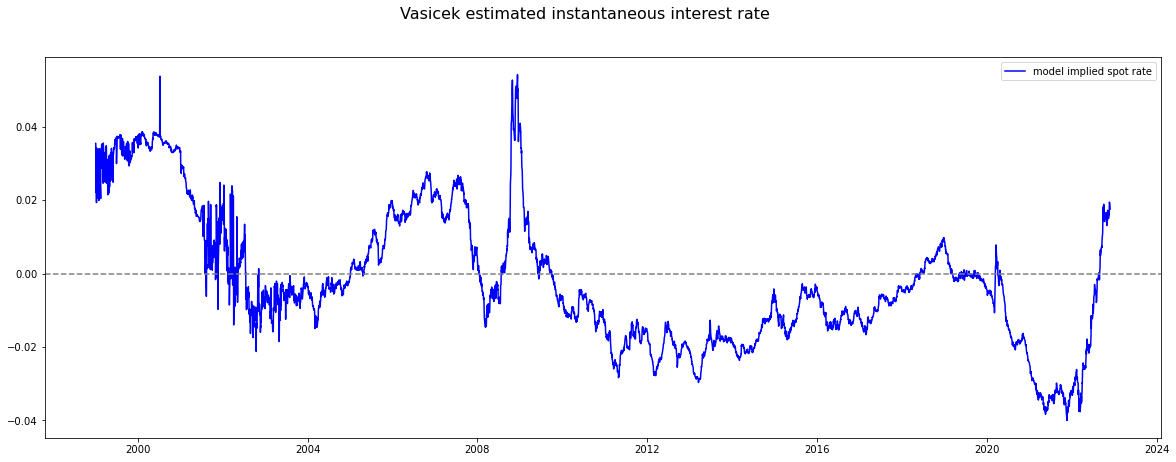

In [22]:
# plot the model derived spot rate given the initial parameters
fig = plt.figure(figsize=(20,7))
fig.tight_layout()
fig.suptitle('Vasicek estimated instantaneous interest rate', fontsize=16)
plt.plot(data.Date, v_spot, label='model implied spot rate', color='b')
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

In [23]:
# compute risk premia for all maturities
tau = np.arange(2,21) # maturities from 2 to 20
b_hat = b_tilde(tau, vtheta) * tau

r_prem = -b_hat*vsigma*vlambda
for i in range(8):
    print(f'The bond risk premium for maturity {i+2}Y is : {round(r_prem[i],6):14}')
for i in range(8, 19):
    print(f'The bond risk premium for maturity {i+2}Y is : {round(r_prem[i],6):13}')

The bond risk premium for maturity 2Y is :       0.016107
The bond risk premium for maturity 3Y is :       0.023145
The bond risk premium for maturity 4Y is :       0.029584
The bond risk premium for maturity 5Y is :       0.035474
The bond risk premium for maturity 6Y is :       0.040862
The bond risk premium for maturity 7Y is :       0.045791
The bond risk premium for maturity 8Y is :         0.0503
The bond risk premium for maturity 9Y is :       0.054424
The bond risk premium for maturity 10Y is :      0.058197
The bond risk premium for maturity 11Y is :      0.061648
The bond risk premium for maturity 12Y is :      0.064805
The bond risk premium for maturity 13Y is :      0.067693
The bond risk premium for maturity 14Y is :      0.070335
The bond risk premium for maturity 15Y is :      0.072752
The bond risk premium for maturity 16Y is :      0.074962
The bond risk premium for maturity 17Y is :      0.076984
The bond risk premium for maturity 18Y is :      0.078834
The bond risk 

Notice that in the standard specification of Vasicek model, the bond risk premium for a given maturity $\tau$ is defined as
$$
\mu_{B, \tau} = -b(\tau)\sigma\lambda
$$
and is, thus, constant over time. In fact, given the volatility of the process for spot rate $\sigma$ and the price of risk $\lambda$ are constant, we are able to determine the risk premium at any time $t$. Specifically, the 10Y-bond risk premium in the estimated Vasicek model is 
$$
\mu_{B, 10} = 0.058197
$$

### 3.4 Extended Vasicek Model
--------------------------
In this section, we implement the ''Extended'' Vasicek Model, allowing the market price of risk $\lambda$ to be a function of the spread of the current spot rate $r_t$ and the long-run equilibrium interest rate $\bar{r}$. We estimate the parameters on the TIPS yield curves and make some consideration on the values of the parameters and on Bond pricing. 

In [24]:
# build functions a_tilde() and b_tilde()
def a_tilde_ext(tau, theta, sigma, rbar, lambda0, lambda1):
    
    theta_t = theta + sigma*lambda1
    p1 = (tau - (1 - np.exp(-theta_t*tau))/(theta_t))*(rbar - (sigma*lambda0)/(theta_t))
    p2 = (sigma*sigma)/(2*(theta_t*theta_t))*(tau - 2*(1 - np.exp(-theta_t*tau))/theta_t + (1 - np.exp(-2*theta_t*tau))/(2*theta_t))
    return (p1 - p2)/tau

def b_tilde_ext(tau, theta, sigma, lambda1): 
    theta_t = theta + sigma*lambda1
    return (1 - np.exp(-theta_t*tau))/(theta_t*tau)

We develop a toy model on some reasonable parameter assumptions to gauge the general behaviour of the model.

In [25]:
# set the initial guesses for the parameters
rbar = 0.03
theta = 0.05
sigma = 0.01
lambda0 = -0.3
lambda1 = -0.1

In [26]:
# create the model implied spot interest rates

# closest yield is 2y
tau = 2

at = a_tilde_ext(tau, theta, sigma, rbar,  lambda0, lambda1)
bt = b_tilde_ext(tau, theta, sigma, lambda1)

print('The value of a(tau=2) is: {}'.format(at*tau))
print('The value of b(tau=2) is: {}'.format(bt*tau))

y_0 = data.TIPSY02

mod_r = np.array((y_0 - at)/bt)

The value of a(tau=2) is: 0.008531010724985947
The value of b(tau=2) is: 1.9051244131852871


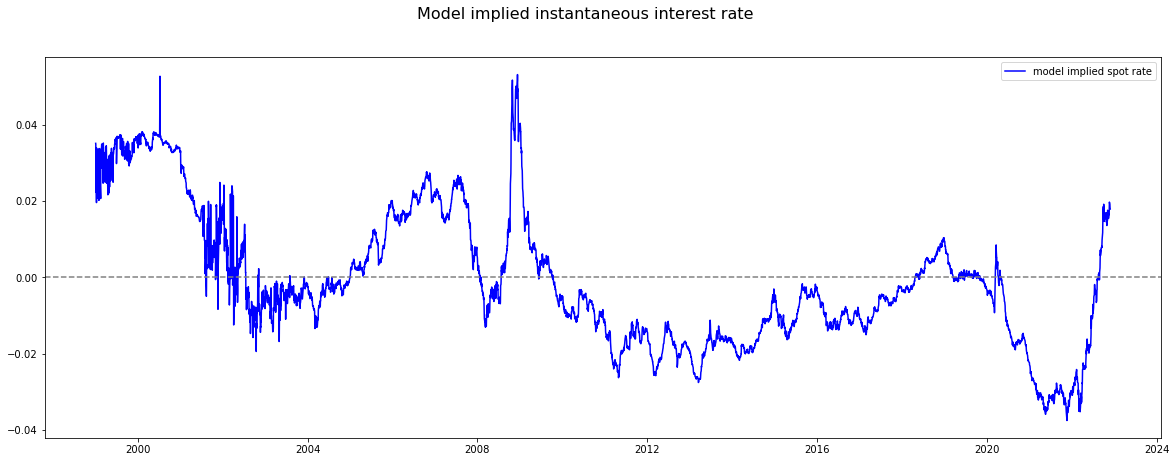

In [27]:
# plot the model derived spot rate given the initial parameters
fig = plt.figure(figsize=(20,7))
fig.tight_layout()
fig.suptitle('Model implied instantaneous interest rate', fontsize=16)
plt.plot(data.Date, mod_r, label='model implied spot rate', color='b')
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

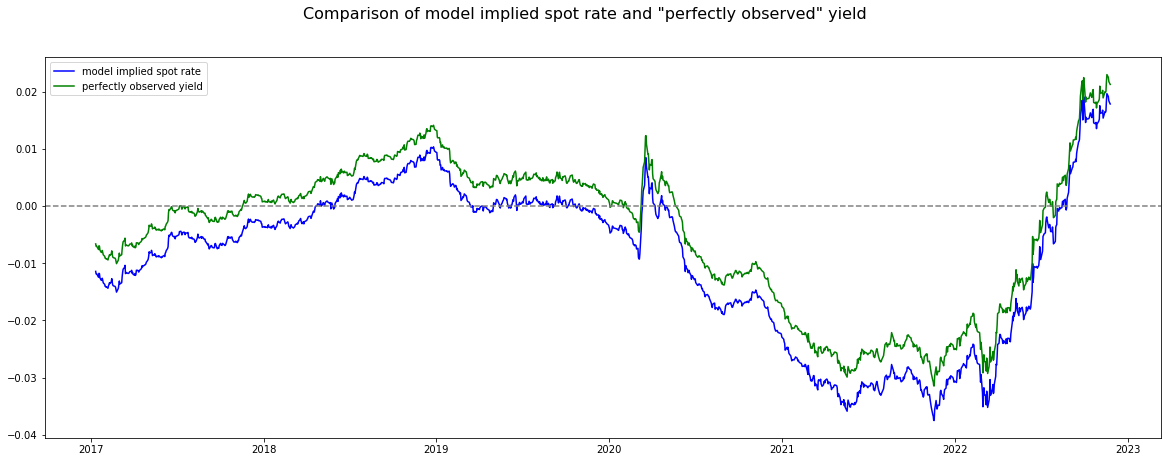

In [28]:
# compare model derived instantaneous rate with "perfectly observed" yield
fig = plt.figure(figsize=(20,7))
fig.tight_layout()
fig.suptitle('Comparison of model implied spot rate and "perfectly observed" yield', fontsize=16)
plt.plot(data.Date[4500:], mod_r[4500:], label='model implied spot rate', color='b')
plt.plot(data.Date[4500:], data.iloc[4500:, 1], label='perfectly observed yield', color='g')
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

In [29]:
# model implied yields of maturities > 1y

tau = np.arange(2,21) # 19 maturities 
a_vec = a_tilde_ext(tau, theta, sigma, rbar, lambda0, lambda1)
b_vec = b_tilde_ext(tau, theta, sigma, lambda1)

mod_r_reshape = mod_r[1:].reshape(-1,1)

# matrix of model implied yields
y_matrix = a_vec + mod_r_reshape*b_vec
    
pd.DataFrame(data=y_matrix, columns=x_axis, index=data.Date[1:]).head(10)

,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,11Y,12Y,13Y,14Y,15Y,16Y,17Y,18Y,19Y,20Y
Date,,,,,,,,,,,,,,,,,,,
1999-01-05,0.037476,0.038677,0.039813,0.040889,0.041910,0.042877,0.043795,0.044667,0.045496,0.046283,0.047033,0.047746,0.048425,0.049073,0.049691,0.050280,0.050843,0.051380,0.051894
1999-01-06,0.026224,0.027691,0.029086,0.030413,0.031675,0.032878,0.034023,0.035115,0.036157,0.037152,0.038102,0.039010,0.039878,0.040708,0.041503,0.042264,0.042994,0.043694,0.044365
1999-01-07,0.025442,0.026928,0.028341,0.029685,0.030964,0.032183,0.033344,0.034452,0.035508,0.036517,0.037481,0.038402,0.039284,0.040127,0.040934,0.041707,0.042449,0.043159,0.043841
1999-01-08,0.036486,0.037710,0.038869,0.039968,0.041009,0.041997,0.042936,0.043827,0.044674,0.045480,0.046247,0.046977,0.047673,0.048337,0.048970,0.049575,0.050152,0.050704,0.051232
1999-01-11,0.022896,0.024442,0.025914,0.027314,0.028648,0.029920,0.031133,0.032290,0.033395,0.034451,0.035460,0.036426,0.037349,0.038234,0.039081,0.039894,0.040673,0.041420,0.042138
1999-01-12,0.036509,0.037733,0.038891,0.039989,0.041030,0.042018,0.042956,0.043846,0.044693,0.045499,0.046265,0.046995,0.047691,0.048354,0.048987,0.049591,0.050168,0.050720,0.051247
1999-01-13,0.035957,0.037194,0.038365,0.039475,0.040528,0.041527,0.042476,0.043378,0.044235,0.045051,0.045827,0.046567,0.047272,0.047944,0.048585,0.049198,0.049783,0.050343,0.050878
1999-01-14,0.036074,0.037308,0.038476,0.039584,0.040634,0.041631,0.042578,0.043477,0.044332,0.045146,0.045920,0.046657,0.047360,0.048031,0.048671,0.049281,0.049865,0.050423,0.050956
1999-01-15,0.034349,0.035624,0.036832,0.037978,0.039065,0.040098,0.041080,0.042013,0.042900,0.043746,0.044551,0.045318,0.046050,0.046748,0.047415,0.048052,0.048662,0.049244,0.049802


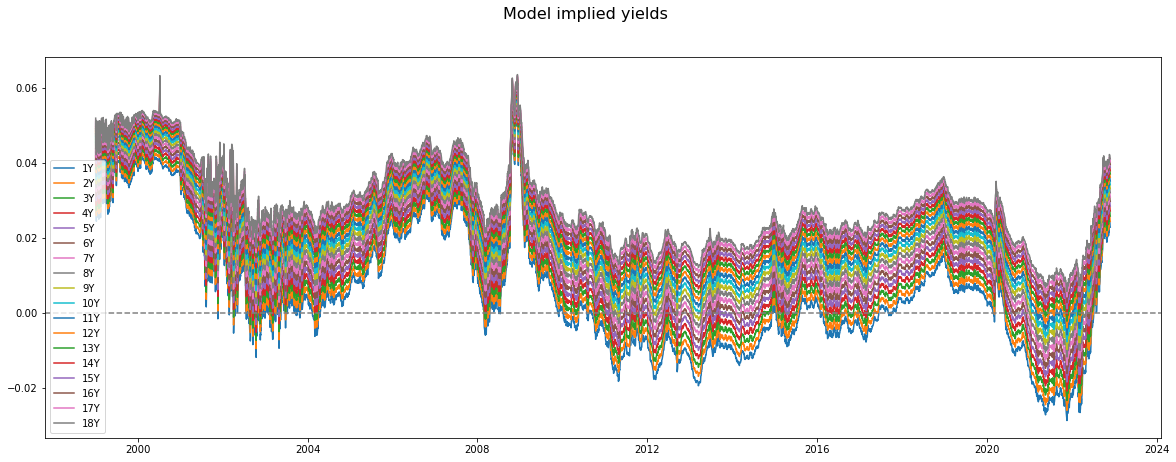

In [30]:
# plot the model derived spot rate given the initial parameters
fig = plt.figure(figsize=(20,7))
fig.tight_layout()
for i in range(y_matrix.shape[1]-1):
    plt.plot(data.Date[1:], y_matrix[:,i+1], label=str(i+1)+'Y')
fig.suptitle('Model implied yields', fontsize=16)
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

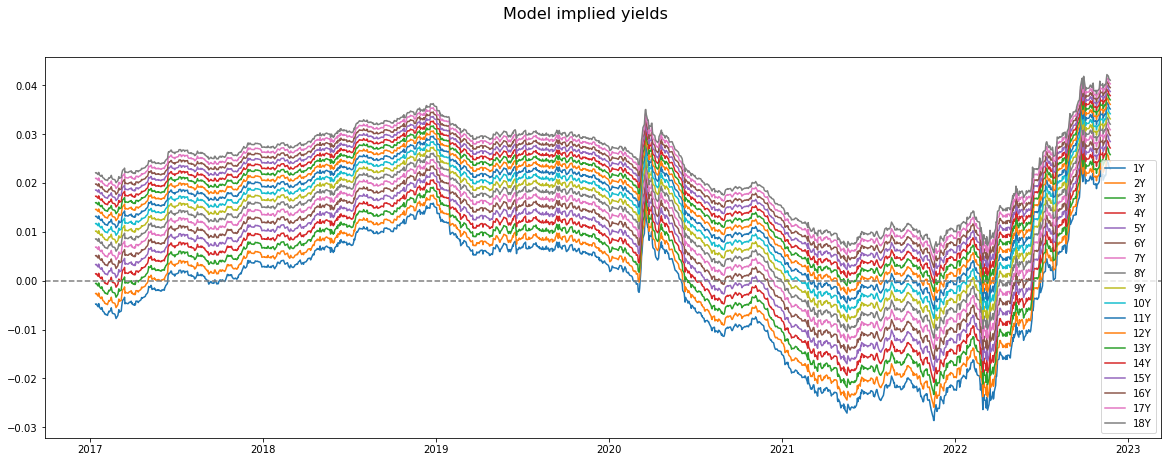

In [31]:
# we zoom in on some interval
fig = plt.figure(figsize=(20,7))
fig.tight_layout()
for i in range(y_matrix.shape[1]-1):
    plt.plot(data.Date[4501:], y_matrix[4500:,i+1], label=str(i+1)+'Y')
fig.suptitle('Model implied yields', fontsize=16)
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

### 3.5 Extended Vasicek Likelihood Function
----
In this section we construct the likelihood function for the extended vasicek model and we estimate the parameters on the time series TIPS yields.

In [32]:
def ext_vasicek_loglik(par, *args):
    
    # init
    svec_sq = np.array(par[5:])**2 # vector of sigma squared
    lambda0 = par[0] # lambda0
    lambda1 = par[1] # lambda1
    theta = par[2] # theta
    sigma = par[3] # sigma_r 
    rbar = par[4] # long-run equilibrium rate
    
    rmat = np.array(args[0]) # input rates
    delta = args[1] # Δt
    
    tau = np.arange(2,21) # maturities from 2 to 20
    a_vec = a_tilde_ext(tau, theta, sigma, rbar, lambda0, lambda1)
    b_vec = b_tilde_ext(tau, theta, sigma, lambda1)

    mod_r = np.array((rmat[:,0] - a_vec[0])/b_vec[0]) # model implied instantaneous rate
    
    mod_r_reshape = mod_r[1:].reshape(-1,1)
    y_matrix = a_vec[1:] + mod_r_reshape*b_vec[1:] # model implied yield matrix
    
    # fitted parameters α and β
    a = rbar*(1-np.exp(-theta*delta))
    b = np.exp(-theta*delta)
    sigma_sq = (sigma*sigma)*(1 - np.exp(-2*theta*delta))/(2*theta) # σ^2(Δt)
    
    # probability of perfectly observed maturity
    probs = -(1/2)*np.log(2*pi*pow(b_vec[0],2)*sigma_sq) - ((mod_r[1:] - a - b*mod_r[:-1])**2/(2*sigma_sq))
    # probability of other maturities
    p1 = (-(1/2)*np.log(2*pi*svec_sq)).reshape(1,-1)
    probs_2 = p1 - ((rmat[1:,1:] - y_matrix)**2)/(2*svec_sq)
    return -1*(probs.sum() + probs_2.sum())

In [33]:
x0 = [-0.3, # lambda0
      -0.1, # lambda1
       0.1, # theta
       0.05, # sigma
      -0.03] # rbar

x0 += [0.01 for i in range(18)] # vectors of estimation error volatilities

delta_t = 1/365 # Δt

In [34]:
bounds = ((None, None), # lambda0
          (None, None), # lambda1
          (1e-6, None), # theta
          (1e-6, None), # sigma
          (None, None), # rbar
          (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None),
          (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None),
          (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None), (1e-6, None)) 

In [35]:
extvasicek_params = minimize(ext_vasicek_loglik, x0=x0, 
                             args=(data.iloc[:, 1:], delta_t), # args: additional arguments (input yields, Δt)
                             bounds = bounds,
                             options={'gtol': 1e-8, 'disp': True}).x

In [36]:
evprint_results(extvasicek_params)

Estimation Results  
-----------------------
lambda0:      -0.298303
lambda1:      -0.100197
theta:          0.09204
sigma_r:       0.029439
r_bar:        -0.030789
-----------------------
observation error vols:
sigma_3:       0.003433
sigma_4:       0.005128
sigma_5:       0.006049
sigma_6:       0.006583
sigma_7:       0.006906
sigma_8:        0.00711
sigma_9:       0.007244
sigma_10:      0.007334
sigma_11:      0.007397
sigma_12:      0.007443
sigma_13:      0.007478
sigma_14:      0.007507
sigma_15:       0.00753
sigma_16:      0.007551
sigma_17:      0.007568
sigma_18:      0.007583
sigma_19:      0.007596
sigma_20:      0.007606


### 3.6 Extended Vasicek Yields and Risk Premia
--- 
In the sequel, we compute the model implied spot interest rate $\hat{r}_t$ using the parameters obtained through MLE. Moreover, we compute the risk premia according to the estimated parameters.

In [37]:
# estimated parameters
evlambda0 = extvasicek_params[0]
evlambda1 = extvasicek_params[1]
evtheta = extvasicek_params[2]
evsigma = extvasicek_params[3]
evrbar = extvasicek_params[4]

In [44]:
# compute model implied spot rate
tau = 2 # perfectly observed maturity

at = a_tilde_ext(tau, evtheta, evsigma, evrbar,  evlambda0, evlambda1)
bt = b_tilde_ext(tau, evtheta, evsigma, evlambda1)

y_0 = data.TIPSY02 # perfectly observed yield timeseries

ev_spot = np.array((y_0 - at)/bt) # vasicek implied spot rate

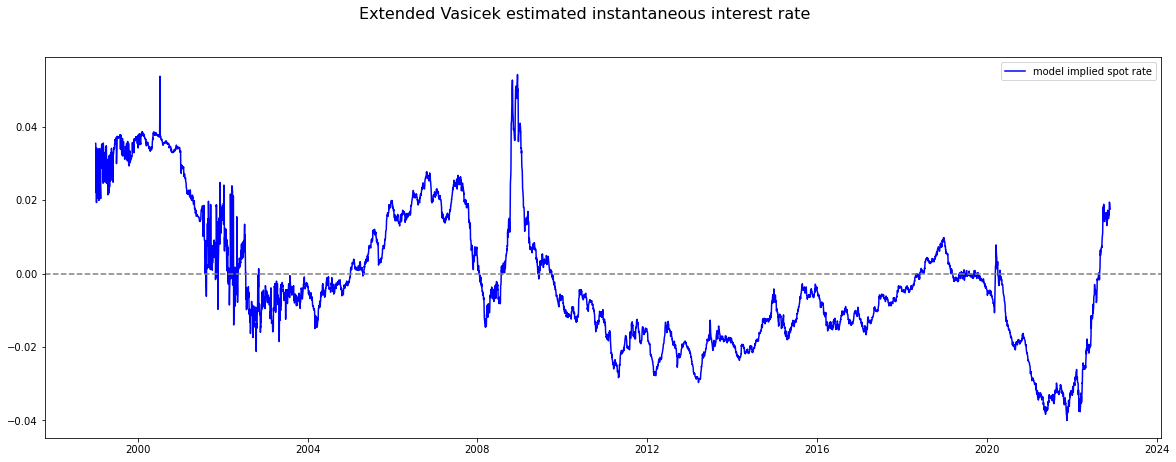

In [39]:
# plot the model derived spot rate given the estimated parameters (extended Vasicek)
fig = plt.figure(figsize=(20,7))
fig.tight_layout()
fig.suptitle('Extended Vasicek estimated instantaneous interest rate', fontsize=16)
plt.plot(data.Date, v_spot, label='model implied spot rate', color='b')
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

In [40]:
# compute risk premia for all maturities
tau = np.arange(2,21) # maturities from 2 to 20
b_hat_ext = b_tilde_ext(tau, evtheta, evsigma, evlambda1) * tau

spot_reshape = ev_spot[1:].reshape(-1,1)

evr_prem = -b_hat_ext*evsigma*(evlambda0 + evlambda1*(spot_reshape - evrbar))

pd.DataFrame(data=evr_prem, columns=x_axis, index=data.Date[1:]).head(10)

,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,11Y,12Y,13Y,14Y,15Y,16Y,17Y,18Y,19Y,20Y
Date,,,,,,,,,,,,,,,,,,,
1999-01-05,0.016444,0.023631,0.030205,0.036219,0.041720,0.046752,0.051355,0.055566,0.059418,0.062942,0.066165,0.069113,0.071811,0.074278,0.076535,0.078600,0.080488,0.082216,0.083796
1999-01-06,0.016378,0.023536,0.030083,0.036072,0.041551,0.046563,0.051148,0.055342,0.059178,0.062687,0.065898,0.068834,0.071521,0.073978,0.076226,0.078282,0.080163,0.081884,0.083458
1999-01-07,0.016373,0.023529,0.030075,0.036062,0.041540,0.046550,0.051133,0.055326,0.059161,0.062670,0.065879,0.068815,0.071501,0.073957,0.076205,0.078260,0.080141,0.081861,0.083435
1999-01-08,0.016439,0.023623,0.030194,0.036206,0.041705,0.046735,0.051337,0.055546,0.059397,0.062919,0.066141,0.069089,0.071785,0.074252,0.076508,0.078572,0.080460,0.082187,0.083767
1999-01-11,0.016358,0.023507,0.030047,0.036029,0.041501,0.046507,0.051086,0.055275,0.059107,0.062612,0.065819,0.068752,0.071435,0.073889,0.076135,0.078188,0.080067,0.081786,0.083358
1999-01-12,0.016439,0.023623,0.030194,0.036206,0.041705,0.046736,0.051337,0.055547,0.059397,0.062920,0.066142,0.069089,0.071786,0.074252,0.076508,0.078572,0.080460,0.082187,0.083767
1999-01-13,0.016435,0.023618,0.030188,0.036199,0.041697,0.046726,0.051327,0.055536,0.059386,0.062907,0.066129,0.069076,0.071771,0.074237,0.076493,0.078557,0.080444,0.082171,0.083751
1999-01-14,0.016436,0.023619,0.030190,0.036200,0.041699,0.046728,0.051329,0.055538,0.059388,0.062910,0.066132,0.069079,0.071774,0.074241,0.076496,0.078560,0.080448,0.082175,0.083754
1999-01-15,0.016426,0.023604,0.030171,0.036178,0.041673,0.046699,0.051297,0.055504,0.059351,0.062871,0.066091,0.069036,0.071730,0.074195,0.076449,0.078511,0.080398,0.082124,0.083702


In the Extended Vasicek model, the market price of risk is modelled as a function of the spread between $r_t$ and its long-run value $\bar{r}$. Now, $\lambda$ has to be computed at each time $t$. Consequently, instead of a constant bond risk premium we can construct a time series of bond risk premia $\mu_{B, \tau, t}$ as follows 

$$
\mu_{B, \tau, t} = -b(\tau)\sigma\lambda_{r,t} = -b(\tau)\sigma\left[\lambda_0 + \lambda_1 (r_t - \bar{r}) \right]
$$

Below, we plot the timeseries of bond risk premium for a maturity of 10Y $\mu_{B, 10, t}$ in comparison with the constant bond risk premium computed in the baseline Vasicek specification $\mu_{B, 10}$.

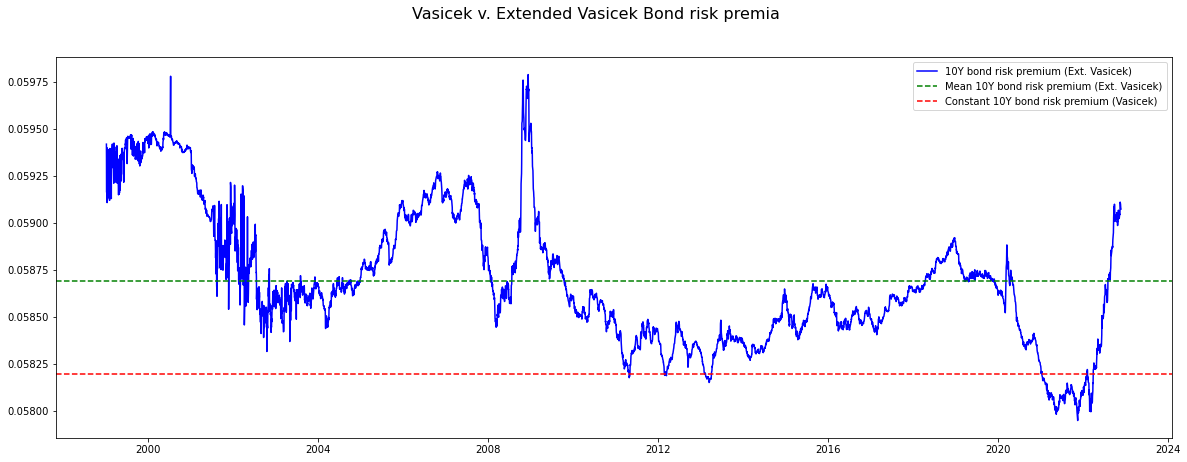

In [52]:
# plot the model derived bond risk premia for both specifications
fig = plt.figure(figsize=(20,7))
fig.tight_layout()
fig.suptitle('Vasicek v. Extended Vasicek Bond risk premia', fontsize=16)
plt.plot(data.Date[1:], evr_prem[:,8], label='10Y bond risk premium (Ext. Vasicek)', color='b')
plt.axhline(y=evr_prem[:,8].mean(), color='g', linestyle='--', label='Mean 10Y bond risk premium (Ext. Vasicek)')
plt.axhline(y=r_prem[8], color='r', linestyle='--', label='Constant 10Y bond risk premium (Vasicek)')
plt.legend()
plt.show()

## 4. Conclusion
---
Let us compare the estimates of the two approaches. 

| Parameter | Vasicek | Extended Vasicek |
| --- | --- | --- |
| $\lambda_0$ ($\lambda$) | -0.298649 | -0.298303 |
| $\lambda_1$ | \ | -0.100197 |
| $\sigma$ | 0.029439 | 0.029439 |
| $\theta$ | 0.089091 | 0.09204 |
| $\bar{r}$ | -0.030904 | -0.030789 |


We observe that the estimates for the parameters of the two models are very similar.

In general, we find that the long-run interest rate value $\bar{r}$ is strongly negative. 
The volatility of the interest rate process $\sigma$ is identical in the two model specifications. This seems trivial since the interest rate process described in \eqref{eq:dynamics} does not change as a consequence of the introduction of the time-varying market price of risk.

It is interesting to analyse the values of $\theta$ in the two models. Indeed, recall that $\theta$ is the parameter that governs the mean reversion speed of \eqref{eq:dynamics}, the higher $\theta$ the faster the process will converge to its long-run value $\bar{r}$. Notice, however, that $\theta$ also contributes to the bond's duration (_i.e._ the sensitivity of the bond to changes in interest rate) $b(\tau)$. Depending on the model specification, $b(\tau)$ can be defined as 

\begin{eqnarray*}
b(\tau) = \frac{1 - e^{\theta \tau}}{\theta} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; &\text{Vasicek Model}\\ 
b(\tau) = \frac{1 - e^{\tilde{\theta} \tau}}{\tilde{\theta}} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; &\text{Extended Vasicek Model}\\ 
\end{eqnarray*}

with $\tilde{\theta} = \theta + \sigma \lambda_1$. In both definitions, as $\theta$ grows larger, the duration diminishes. Notice that, with the current parametrization of the Extended Vasicek model:

\begin{equation*}
    \tilde{\theta} = \theta + \sigma \lambda_1 = 0.09204 + 0.029439(-0.100197) = 0.08909
\end{equation*}

which is very close to the value of $\theta$ in the baseline Vasicek model. We conclude that the bond duration does not change in the extended model.

Finally, considering the values of $\lambda$ (Vasicek model) and $\lambda_0, \lambda_1$ (Extended Vasicek model) we observe that, as expected, all values are negative. 
Moreover, we find that $\lambda$ in Vasicek model and $\lambda_0$ in the Extended Vasicek model are considerably similar. This is coherent with the fact that the extension boils down to Vasicek model when $\lambda_1 = 0$.